In [3]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
print(train_images.ndim)

3


In [7]:
print(test_images.shape)

(10000, 28, 28)


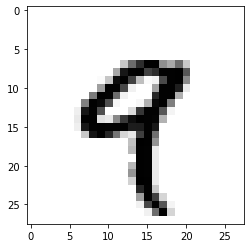

In [8]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images,  test_labels, verbose=2)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2969 - accuracy: 0.9142
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1419 - accuracy: 0.9577
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1050 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0864 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0716 - accuracy: 0.9772
10000/1 - 0s - loss: 0.0379 - accuracy: 0.9768


[0.07467966814141255, 0.9768]

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
0,0.296881,0.914167,0
1,0.141918,0.957733,1
2,0.105028,0.967933,2
3,0.086399,0.972783,3
4,0.071626,0.977183,4


In [13]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


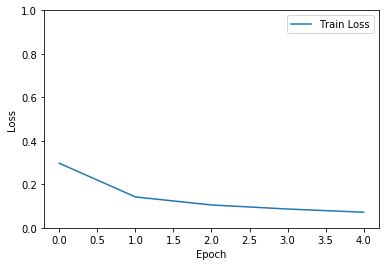

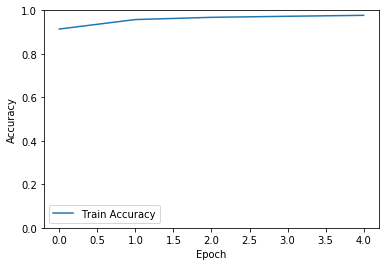

In [14]:
plot_history(history)